In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
file_path = '../../data_storage/CyberBullying_balancedDataNew.csv'  # Replace with your actual file path
cleaned_data = pd.read_csv(file_path)

In [3]:
# Inspect the cleaned dataset
print(cleaned_data.info())
print(cleaned_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234480 entries, 0 to 234479
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    234453 non-null  object
 1   Label   234480 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB
None
                                                Text  Label
0                           u0 lmao wow fuck you too      0
1  a white dress and red lipstick make everything...      0
2  this has been a trend since <number> of course...      0
3  <user> <user> babies in cages destroying envir...      0
4  <user> more good neighbours yes that working o...      0


In [4]:
# Check the label distribution
label_distribution = cleaned_data['Label'].value_counts()

# Print the cleaned label distribution
print("Label Distribution:")
print(label_distribution)

Label Distribution:
Label
1    117751
0    116729
Name: count, dtype: int64


In [5]:
# Convert labels to integers for visualization
cleaned_data['Label'] = cleaned_data['Label'].astype(int)

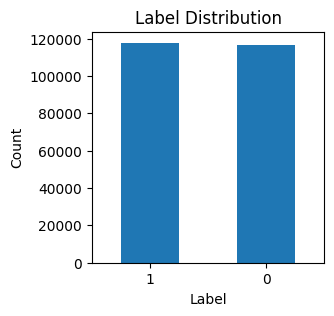

In [6]:
# Plot the label distribution
plt.figure(figsize=(3, 3))
label_distribution.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/yashas_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/yashas_k/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yashas_k/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yashas_k/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Define text preprocessing function
def preprocess_text(text):

    # Check if input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ''
    # Remove numbers
    text = re.sub(r'\b\d+\b', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove tags like <xyz>
    text = re.sub(r'<[^>]+>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove the word 'u0'
    text = re.sub(r'\bu0\b', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    # Remove repeated words
    tokens = list(dict.fromkeys(tokens))
    return ' '.join(tokens)

# Apply preprocessing to the dataset
cleaned_data['Cleaned_Text'] = cleaned_data['Text'].apply(preprocess_text)

# Drop rows where 'Cleaned_Text' is empty
cleaned_data = cleaned_data[cleaned_data['Cleaned_Text'] != '']

cleaned_data.head()

,Text,Label,Cleaned_Text
0,u0 lmao wow fuck you too,0,lmao wow fuck
1,a white dress and red lipstick make everything...,0,white dress red lipstick make everything better
2,this has been a trend since <number> of course...,0,trend since course wall street assumed eternal...
3,<user> <user> babies in cages destroying envir...,0,baby cage destroying environment rolling back ...
4,<user> more good neighbours yes that working o...,0,good neighbour yes working well crime skyrocke...


In [9]:
# Analyze text lengths (word and character counts)
cleaned_data['Word_Count'] = cleaned_data['Cleaned_Text'].apply(lambda x: len(x.split()))
cleaned_data['Char_Count'] = cleaned_data['Cleaned_Text'].apply(len)

# Display basic statistics
print("Word Count Stats:")
print(cleaned_data['Word_Count'].describe())

print("\nCharacter Count Stats:")
print(cleaned_data['Char_Count'].describe())

# Most common words in the cleaned text
all_cleaned_words = ' '.join(cleaned_data['Cleaned_Text']).split()
word_freq = Counter(all_cleaned_words)
print("\nMost Common Words in Cleaned Text:")
print(word_freq.most_common(10))

Word Count Stats:
count    234060.000000
mean         24.558071
std          35.583312
min           1.000000
25%           7.000000
50%          13.000000
75%          27.000000
max         607.000000
Name: Word_Count, dtype: float64

Character Count Stats:
count    234060.000000
mean        173.061894
std         264.407795
min           1.000000
25%          46.000000
50%          89.000000
75%         188.000000
max        9965.000000
Name: Char_Count, dtype: float64

Most Common Words in Cleaned Text:
[('article', 38774), ('page', 35165), ('like', 32543), ('dont', 29782), ('one', 28371), ('wikipedia', 26639), ('would', 26087), ('please', 25105), ('im', 22625), ('think', 22472)]


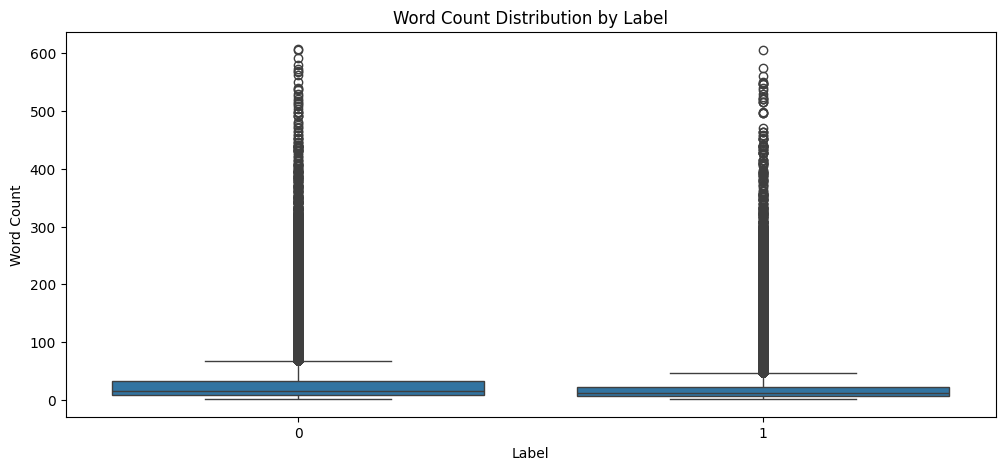

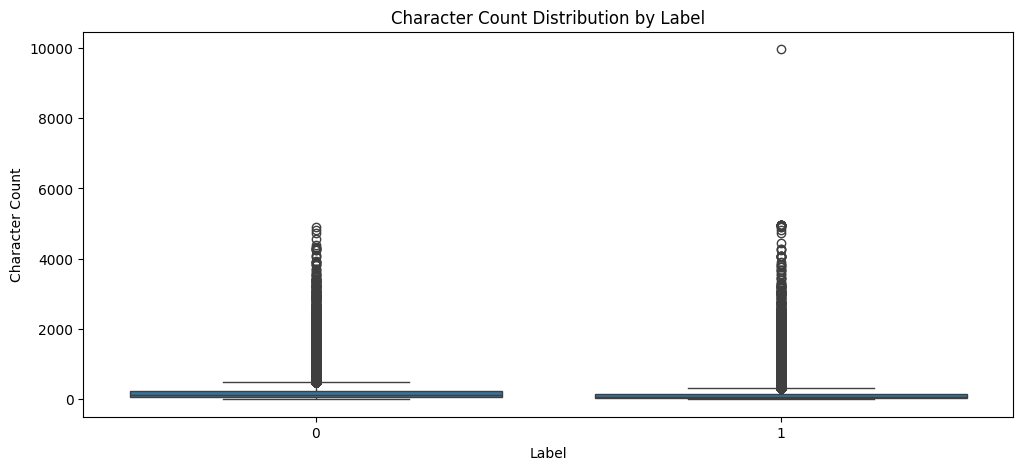

In [10]:
# Text Length Distribution by Label
plt.figure(figsize=(12, 5))
sns.boxplot(data=cleaned_data, x='Label', y='Word_Count')
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=cleaned_data, x='Label', y='Char_Count')
plt.title('Character Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Character Count')
plt.show()

In [11]:
# Common Words Analysis per Label
labels = cleaned_data['Label'].unique()
for label in labels:
    label_text = ' '.join(cleaned_data[cleaned_data['Label'] == label]['Cleaned_Text'])
    label_words = label_text.split()
    word_freq = Counter(label_words)
    print(f"\nMost Common Words for Label {label}:")
    print(word_freq.most_common(10))


Most Common Words for Label 0:
[('article', 25004), ('page', 21891), ('like', 17166), ('please', 16607), ('would', 16425), ('one', 16200), ('wikipedia', 16037), ('dont', 15163), ('see', 13023), ('think', 12965)]

Most Common Words for Label 1:
[('like', 15377), ('dont', 14619), ('article', 13770), ('page', 13274), ('fuck', 12597), ('one', 12171), ('im', 11004), ('wikipedia', 10602), ('people', 10335), ('get', 10168)]


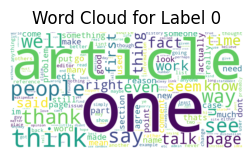

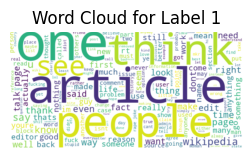

In [12]:
# Generate Word Clouds for Each Label
for label in labels:
    label_text = ' '.join(cleaned_data[cleaned_data['Label'] == label]['Cleaned_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(label_text)
    
    plt.figure(figsize=(3, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label {label}')
    plt.axis('off')
    plt.show()

In [13]:
# Download NLTK resources for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yashas_k/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Function to extract and display n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_freq = list(zip(ngram_vocab, ngram_counts))
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Analyze n-grams for each label
labels = cleaned_data['Label'].unique()
for label in labels:
    label_text = cleaned_data[cleaned_data['Label'] == label]['Cleaned_Text']
    print(f"\nTop 10 Bigrams for Label {label}:")
    print(get_top_ngrams(label_text, ngram_range=(2, 2), top_n=10))

    print(f"\nTop 10 Trigrams for Label {label}:")
    print(get_top_ngrams(label_text, ngram_range=(3, 3), top_n=10))


Top 10 Bigrams for Label 0:
[('talk page', np.int64(5058)), ('dont know', np.int64(1750)), ('personal attack', np.int64(1680)), ('use sandbox', np.int64(1680)), ('feel free', np.int64(1636)), ('speedy deletion', np.int64(1503)), ('blocked editing', np.int64(1345)), ('dont think', np.int64(1307)), ('im sure', np.int64(1219)), ('ip address', np.int64(1070))]

Top 10 Trigrams for Label 0:
[('learn contributing encyclopedia', np.int64(1018)), ('want look welcome', np.int64(868)), ('wikipedia test worked', np.int64(836)), ('sandbox want look', np.int64(807)), ('use sandbox want', np.int64(805)), ('removed use sandbox', np.int64(802)), ('reverted removed use', np.int64(775)), ('worked reverted removed', np.int64(756)), ('test worked reverted', np.int64(754)), ('criterion speedy deletion', np.int64(750))]

Top 10 Bigrams for Label 1:
[('talk page', np.int64(3342)), ('dumb nigger', np.int64(2180)), ('rape joke', np.int64(1751)), ('dont know', np.int64(1496)), ('personal attack', np.int64(1202


Sentiment Summary by Label:
       Sentiment_Positive  Sentiment_Negative  Sentiment_Neutral  \
Label                                                              
0                0.107476            0.076479           0.816030   
1                0.098116            0.176760           0.725019   

       Sentiment_Compound  
Label                      
0                0.135340  
1               -0.164865  


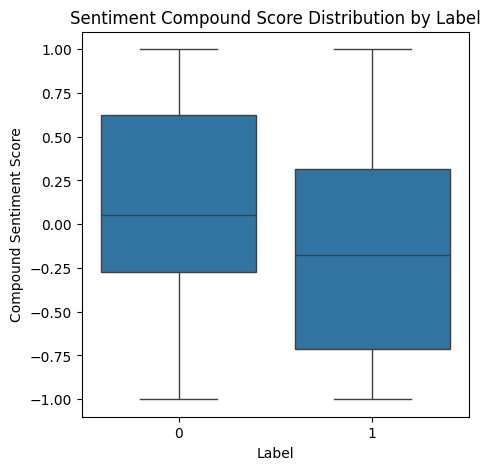

In [15]:
# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the dataset
cleaned_data['Sentiment'] = cleaned_data['Text'].apply(analyze_sentiment)

# Extract sentiment metrics
cleaned_data['Sentiment_Positive'] = cleaned_data['Sentiment'].apply(lambda x: x['pos'])
cleaned_data['Sentiment_Negative'] = cleaned_data['Sentiment'].apply(lambda x: x['neg'])
cleaned_data['Sentiment_Neutral'] = cleaned_data['Sentiment'].apply(lambda x: x['neu'])
cleaned_data['Sentiment_Compound'] = cleaned_data['Sentiment'].apply(lambda x: x['compound'])


numeric_sentiment_columns = ['Sentiment_Positive', 'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Compound']

# Group by label and calculate the mean only for numeric columns
sentiment_summary = cleaned_data.groupby('Label')[numeric_sentiment_columns].mean()

# Display the sentiment summary
print("\nSentiment Summary by Label:")
print(sentiment_summary)

# Visualize sentiment distributions
plt.figure(figsize=(5,5 ))
sns.boxplot(data=cleaned_data, x='Label', y='Sentiment_Compound')
plt.title('Sentiment Compound Score Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Compound Sentiment Score')
plt.show()

In [25]:
import os
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [18]:
# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(cleaned_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Calculate and print the sizes of the training, validation, and test datasets
train_size = len(train_data)
val_size = len(val_data)
test_size = len(test_data)

print(f"Training Data Size: {train_size}")
print(f"Validation Data Size: {val_size}")
print(f"Test Data Size: {test_size}")

Training Data Size: 168523
Validation Data Size: 18725
Test Data Size: 46812


In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_data(texts, labels, max_length=230):
    tokenized = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tokenized['input_ids'],
        'attention_mask': tokenized['attention_mask'],
        'labels': tf.convert_to_tensor(labels.values, dtype=tf.int32)
    }

# Tokenize datasets
train_tokens = tokenize_data(train_data['Text'], train_data['Label'])
val_tokens = tokenize_data(val_data['Text'], val_data['Label'])
test_tokens = tokenize_data(test_data['Text'], test_data['Label'])

In [41]:
# Load the pretrained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, hidden_dropout_prob=0.2)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer='Adam', loss=loss, metrics=metrics, weighted_metrics=None)
model.optimizer.learning_rate.assign(2e-5)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.9999999494757503e-05>

In [ ]:
# Train the model explicitly unpacking input
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,  # Stop after 2 epochs without improvement
    restore_best_weights=True
)

history = model.fit(
    x={
        'input_ids': train_tokens['input_ids'],
        'attention_mask': train_tokens['attention_mask']
    },
    y=train_tokens['labels'],
    validation_data=(
        {
            'input_ids': val_tokens['input_ids'],
            'attention_mask': val_tokens['attention_mask']
        },
        val_tokens['labels']
    ),
    epochs=3,
    batch_size=15
)

In [ ]:
# Evaluate the model on the test set
test_predictions = model.predict({
    'input_ids': test_tokens['input_ids'],
    'attention_mask': test_tokens['attention_mask']
})
predicted_labels = tf.argmax(test_predictions.logits, axis=1).numpy()

# Print classification report
print("Classification Report:")
print(classification_report(test_data['Label'], predicted_labels))

# Generate and display confusion matrix
cm = confusion_matrix(test_data['Label'], predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Cyberbullying", "Cyberbullying"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model_name = "cyberbullying_saved_model"
tokenizer_name = "cyberbullying_saved_tokenizer"

# Save the model and tokenizer
model.save_pretrained(f'./{model_name}')
tokenizer.save_pretrained(f'./{tokenizer_name}')

print(f"Model saved successfully in directory: {model_name}")
print(f"Tokenizer saved successfully in directory: {tokenizer_name}")


In [ ]:
# Load the saved model and tokenizer
model_path = "./cyberbullying_saved_model"  # Path to your saved model
tokenizer_path = "./cyberbullying_saved_tokenizer"  # Path to your saved tokenizer

saved_model = TFBertForSequenceClassification.from_pretrained(model_path)
saved_tokenizer = BertTokenizer.from_pretrained(tokenizer_path)

print("Model and tokenizer loaded successfully!")

In [ ]:
new_comments = [
    "You're so fucking dumb, can't believe anyone listens to you.",  # Cyberbullying
    "You're amazing at what you do. Keep inspiring others!",         # Not Cyberbullying
    "Why don't you just fuck off already?",                          # Cyberbullying
    "You're such a wonderful person. Always so kind!",               # Not Cyberbullying
    "Nobody gives a shit about you. Just leave.",                    # Cyberbullying
    "Great work on the project. You crushed it!",                    # Not Cyberbullying
    "You're a total piece of shit. Go away.",                        # Cyberbullying
    "Thanks for always being so supportive. You're the best!",       # Not Cyberbullying
    "You're fucking useless. Nobody wants you here.",                # Cyberbullying
    "You always make everyone around you feel valued and loved."     # Not Cyberbullying
]

In [ ]:
# Tokenize the new comments
inputs = saved_tokenizer(
    new_comments,
    max_length=128,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)

# Perform predictions
outputs = saved_model(inputs)
logits = outputs.logits

# Get predicted class labels
predicted_labels = tf.argmax(logits, axis=1).numpy()

# Map the labels to class names
label_map = {0: "Not Cyberbullying", 1: "Cyberbullying"}
predictions = [label_map[label] for label in predicted_labels]

# Display results
for comment, prediction in zip(new_comments, predictions):
    print(f"Comment: {comment}")
    print(f"Prediction: {prediction}")